In [41]:
# Exercício 1 – Higienização Básica

# Primeiro precisa ler o dataset
import pandas as pd

df = pd.read_excel('faltas_treinamento_sujo.xlsx')

# a) Verifique valores nulos e tipos incorretos.
# df.isnull() verifica de forma booleana se há valores nulos - True = valor nulo - False = valor não nulo
# se acrescentar o .sum() ele traz a quantidade de valores nulos somados por categoria
print("Os valores nulos por coluna:")
print(df.isnull().sum())
print()
print("Os tipos de formatos de dados de cada coluna:")
print(df.dtypes)
print()
print("Uma amostra das primeiras 10 linhas do dataset:")
print(df.head(10))

Os valores nulos por coluna:
Nome                           0
Departamento                   0
Turno                          0
Faltas                         0
Dia_da_Semana_Ultima_Falta     0
Data_Ultima_Falta              0
Evadiu                        14
dtype: int64

Os tipos de formatos de dados de cada coluna:
Nome                          object
Departamento                  object
Turno                         object
Faltas                         int64
Dia_da_Semana_Ultima_Falta    object
Data_Ultima_Falta             object
Evadiu                        object
dtype: object

Uma amostra das primeiras 10 linhas do dataset:
              Nome Departamento  Turno  Faltas Dia_da_Semana_Ultima_Falta  \
0  Colaborador_001    Operações  Manhã      14                     Quarta   
1  Colaborador_002    Operações  Manhã       1                    Segunda   
2  Colaborador_003       Vendas  Manhã       3                    segunda   
3  Colaborador_004    Marketing  manha       3    

In [42]:
# b) Corrija a coluna de datas inválidas.
# Não estava dando certo a conversão, então pedi para que o pandas ignore os erros de preenchimento, por exemplo: "32/02/2025"
df['Data_Ultima_Falta'] = pd.to_datetime(df['Data_Ultima_Falta'], errors='coerce', dayfirst=True)
print("Linhas com datas inválidas (convertidas para NaT):")
print(df[df["Data_Ultima_Falta"].isnull()])


Linhas com datas inválidas (convertidas para NaT):
                Nome Departamento  Turno  Faltas Dia_da_Semana_Ultima_Falta  \
1    Colaborador_002    Operações  Manhã       1                    Segunda   
59   Colaborador_060           RH  Tarde       1                     Quarta   
84   Colaborador_085    Marketing  manha       1                     Quinta   
85   Colaborador_086           RH  Tarde       3                    segunda   
135  Colaborador_136    Marketing  Tarde       2                     Quinta   
138  Colaborador_139    Marketing  Manhã       1                     Quinta   
143  Colaborador_144    Marketing  Tarde       1                    Segunda   
165  Colaborador_166    Marketing  TARDE       4                     Quarta   
174  Colaborador_175   Financeiro  TARDE       0                      Sexta   
188  Colaborador_189           RH  manha       1                     Quarta   
197  Colaborador_198    Operações  manha       1                    segunda   
2

In [43]:
# c) Normalize os nomes dos turnos e dias da semana.
df['Turno'] = df['Turno'].str.lower()
df['Dia_da_Semana_Ultima_Falta'] = df['Dia_da_Semana_Ultima_Falta'].str.lower() 
#print(df['Turno'])
#print(df['Dia_da_Semana_Ultima_Falta'])

df['Turno'] = df['Turno'].str.strip().str.title()
df['Dia_da_Semana_Ultima_Falta'] = df['Dia_da_Semana_Ultima_Falta'].str.strip().str.title()
#print(df['Turno'])
#print(df['Dia_da_Semana_Ultima_Falta'])

df['Dia_da_Semana_Ultima_Falta'] = df['Dia_da_Semana_Ultima_Falta'].replace({
    'Segunda': 'Segunda-feira',
    'Terça': 'Terça-feira',
    'Quarta': 'Quarta-feira',
    'Quinta': 'Quinta-feira',
    'Sexta': 'Sexta-feira'
})
print(df['Dia_da_Semana_Ultima_Falta'])

0       Quarta-feira
1      Segunda-feira
2      Segunda-feira
3      Segunda-feira
4       Quarta-feira
           ...      
219    Segunda-feira
220    Segunda-feira
221    Segunda-feira
222    Segunda-feira
223     Quinta-feira
Name: Dia_da_Semana_Ultima_Falta, Length: 224, dtype: object


In [44]:
# Exercício 2 – Remoção e Substituição

# a) Remova os registros duplicados.
# o df.shape(0) é utlizado para contar quantos registros existem, então fiz antes e depois de aplicar o drop_duplicates()

print("Antes:", df.shape[0], "linhas")
df = df.drop_duplicates()
print("Depois:", df.shape[0], "linhas")

Antes: 224 linhas
Depois: 219 linhas


In [45]:
# b) Substitua os valores nulos da coluna Evadiu por “Desconhecido”.

print("Antes:")
print(df['Evadiu'].isnull().sum())

# fillna substitui os valores nulos na coluna por algo definido por você, como no caso: "Desconhecido"
df['Evadiu'] = df['Evadiu'].fillna('Desconhecido')

# A ideia é que depois ele traga valor
print("Depois:")
print(df['Evadiu'].isnull().sum()) 

Antes:
13
Depois:
0


In [46]:
# c) Substitua os valores nulos da coluna Data_Ultima_Falta pela data mais comum.

data_mais_comum = df['Data_Ultima_Falta'].mode()[0]
print("Data mais comum:", data_mais_comum)

df['Data_Ultima_Falta'] = df['Data_Ultima_Falta'].fillna(data_mais_comum)

Data mais comum: 2024-03-20 00:00:00


In [47]:
# Exercício 3 – Correções e Detecção de Outliers

# a) Converta a coluna Faltas para tipo inteiro.

# Não coloquei direto o "astype('int64') porque não sei se existem dados nulos, o errors='coerce" limpa valores inválidos, transformando-os em NaN
df['Faltas'] = pd.to_numeric(df['Faltas'], errors='coerce').astype('Int64')
print(df['Faltas'])

0      14
1       1
2       3
3       3
4       1
       ..
214     3
215     1
216     2
217     1
218     0
Name: Faltas, Length: 219, dtype: Int64


In [48]:
# b) Substitua outliers de faltas por np.nan e depois pela mediana.

import numpy as np

# IQR (Intervalo Interquartil)
Q1 = df['Faltas'].quantile(0.25)  # 1º quartil (25%) - É o valor abaixo do qual estão 25% dos dados
Q3 = df['Faltas'].quantile(0.75)  # 3º quartil (75%) - É o valor abaixo do qual estão 75% dos dados.
IQR = Q3 - Q1                     # Intervalo interquartil - Um menos o outro - faixa central dos dados (os 50% do meio)

limite_inferior = Q1 - 1.5 * IQR # 1.5 é uma regra empírica estatística muito usada que faz parte do método IQR
limite_superior = Q3 + 1.5 * IQR

# Se o valor na coluna faltas for menos que o limite inferior OU maior que o limite superior, converta em np.nan (como um Ctrl U)
df.loc[(df['Faltas'] < limite_inferior) | (df['Faltas'] > limite_superior), 'Faltas'] = np.nan

mediana = df['Faltas'].median()
df['Faltas'] = df['Faltas'].fillna(mediana)
print(df)


                Nome Departamento  Turno  Faltas Dia_da_Semana_Ultima_Falta  \
0    Colaborador_001    Operações  Manhã       2               Quarta-feira   
1    Colaborador_002    Operações  Manhã       1              Segunda-feira   
2    Colaborador_003       Vendas  Manhã       3              Segunda-feira   
3    Colaborador_004    Marketing  Manha       3              Segunda-feira   
4    Colaborador_005           RH  Manha       1               Quarta-feira   
..               ...          ...    ...     ...                        ...   
214  Colaborador_215    Operações  Tarde       3              Segunda-feira   
215  Colaborador_216    Operações  Manha       1              Segunda-feira   
216  Colaborador_217   Financeiro  Tarde       2              Segunda-feira   
217  Colaborador_218           RH  Tarde       1                Terça-feira   
218  Colaborador_219   Financeiro  Manhã       0                Sexta-feira   

    Data_Ultima_Falta Evadiu  
0          2024-01-1

In [49]:
# c) Crie um flag “Faltas_Suspeitas” para valores > 10.

df['Faltas_Suspeitas'] = df['Faltas'] > 10
print(df[df['Faltas_Suspeitas']])
print("Total de faltas suspeitas:", df['Faltas_Suspeitas'].sum())

# Ele apresentará tudo "False" pois ao realizar a limpeza dos outliers, o código removeu todos os valores de faltas acima de 10
print(df['Faltas'] > 10)

Empty DataFrame
Columns: [Nome, Departamento, Turno, Faltas, Dia_da_Semana_Ultima_Falta, Data_Ultima_Falta, Evadiu, Faltas_Suspeitas]
Index: []
Total de faltas suspeitas: 0
0      False
1      False
2      False
3      False
4      False
       ...  
214    False
215    False
216    False
217    False
218    False
Name: Faltas, Length: 219, dtype: boolean


Total de evasões por departamento:
Departamento
Marketing     6
Operações     4
Financeiro    4
Vendas        3
RH            3
TI            1
Name: count, dtype: int64


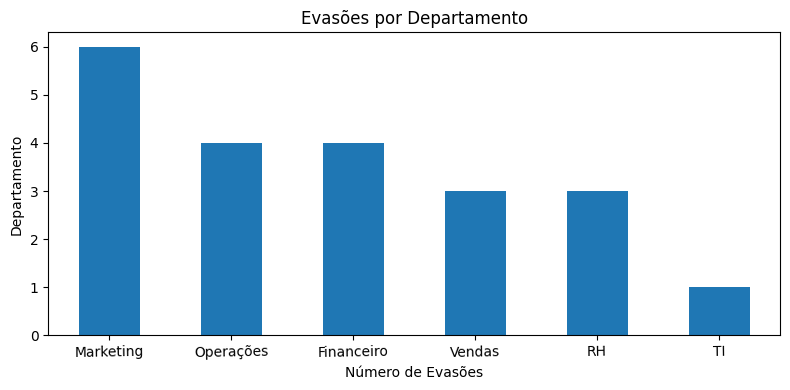

In [50]:
# Exercício 4 – Análise Descritiva Avançada

# a) Qual o número total de evasões por departamento?

evasao = df[df['Evadiu'] == 'Sim']
#print(evasao)
# Podemos usar o value_couts() ou o grupby() que já vi em outros exercícios
evasoes_por_departamento = evasao['Departamento'].value_counts()

print("Total de evasões por departamento:")
print(evasoes_por_departamento)

# Observa-se que o departamento de marketing é responsável pela maior parte das evasões
import matplotlib.pyplot as plt
evasoes_por_departamento.plot(kind='bar', figsize=(8, 4), title='Evasões por Departamento')
plt.xlabel('Número de Evasões')
plt.xticks(rotation=1)
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()

In [51]:
# b) Qual é o percentual de evasão considerando apenas os que participaram do turno da tarde?

# Filtra só que é do turno da tarde
tarde = df[df['Turno'] == 'Tarde']
# Faz a contagem de elementos que ele encontrou (len)
total_tarde = len(tarde)
#print(total_tarde)

# Aqui filtra o turno tarde e que também tenha "Sim" na coluna "Evadiu"
evasao_tarde = tarde[tarde['Evadiu'] == 'Sim']
# Conta quantos elementos satisfazem a condição acima
total_evasao_tarde = len(evasao_tarde)
#print(total_evasao_tarde)

# Percentual é a contagem do total de alunos da tarde que evadiram, dividido pelo total de evasão vezes cem
percentual = round((total_evasao_tarde / total_tarde) * 100, 2)
print(f"Percentual de evasão no turno da tarde: {percentual}%")


Percentual de evasão no turno da tarde: 8.85%


In [53]:
# c) Qual é o desvio padrão de faltas por turno?
# mede o quanto os valores variam em relação à média, então, se o desvio for alto, 
# significa que as pessoas tiveram qtd de faltas bem diferentes.

desvio_padrao_por_turno = df.groupby('Turno')['Faltas'].std()

print("O desvio padrão das faltas dos alunos agrupadas por turno:")
#print(desvio_padrao_por_turno)

# Ao imprimir, percebi que existia duas formas de turno "Manha e Manhã, então vou fazer um replace para corrigir"

# Antes de converter, vou deixar tudo em minúsculo para ter certeza que estarão iguais para a conversão
df['Turno'] = df['Turno'].astype(str).str.strip().str.lower()
df['Turno'] = df['Turno'].replace({
    'Manha': 'M',
    'Manhã': 'M',
    'Tarde': 'T'
})

print(desvio_padrao_por_turno)

O desvio padrão das faltas dos alunos agrupadas por turno:
Turno
M    1.376872
T    1.430269
Name: Faltas, dtype: Float64


O Mês com maior número de faltas foi: 2024-03 (161 faltas)


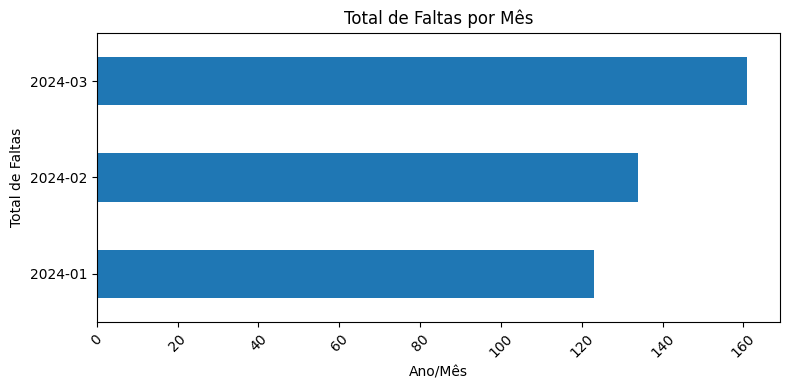

In [56]:
# Exercício 5 – Análise Temporal

# a) Em qual mês ocorreu o maior número de faltas?

# Converto para pd.to_datetime a coluna que desejo, ignoro possíveis erros de preenchimento com errors='coerce',
# Por exemplo, no caso da pessoa digitar 32/02/2025, e por último dayfirst=True, para minha data iniciar pelo dia.

df['Data_Ultima_Falta'] = pd.to_datetime(df['Data_Ultima_Falta'], errors='coerce', dayfirst=True)

# Criar uma coluna para extrair o ano e o mês de nossas células pd.to_datetime e selecionar o período dt.to_period('M')
# Ao final eu transformei o resultado em astype(str) porque ele é melhor para fazer agrupamento
df['AnoMes'] = df['Data_Ultima_Falta'].dt.to_period('M').astype(str)

# Aqui vou agrupar (groupby()) a soma de faltas (sum()) por mês na coluna criada
faltas_por_mes = df.groupby('AnoMes')['Faltas'].sum()

# Aqui ele retornará o índice do mês com maior número de faltas
mes_mais_faltas = faltas_por_mes.idxmax()
# Aqui ele retornará qual foi a soma de faltas do maior mês
total_mais_faltas = faltas_por_mes.max()

print(f"O Mês com maior número de faltas foi: {mes_mais_faltas} ({total_mais_faltas} faltas)")

faltas_por_mes.plot(kind='barh', title='Total de Faltas por Mês', figsize=(8, 4))
plt.xlabel('Ano/Mês')
plt.ylabel('Total de Faltas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




A Semana com maior número de faltas foi a semana: 12 (com 57 faltas)



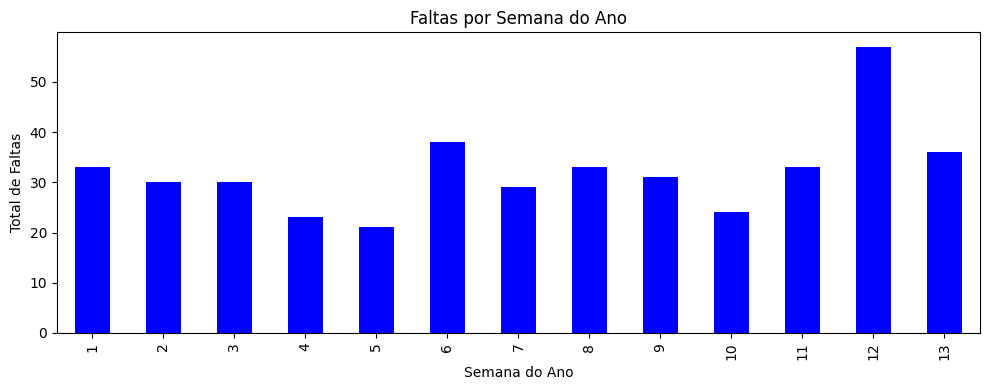

In [64]:
# b) Crie uma coluna Semana_Ultima_Falta e descubra qual semana teve maior concentração de ausências.

df['Data_Ultima_Falta'] = pd.to_datetime(df['Data_Ultima_Falta'], errors='coerce', dayfirst=True)

# Aqui eu crio uma coluna para apurar a semana da última falta e aplico dt.isocalendar().week
# Ele serve para mostrar o número da semana numa escala ISO do ano (de 1 a 53 semanas)
df['Semana_Ultima_Falta'] = df['Data_Ultima_Falta'].dt.isocalendar().week

# Aqui mais uma vez usamos groupby para juntar a soma de faltas em cada semana, conforme extraímos na linha acima
faltas_por_semana = df.groupby('Semana_Ultima_Falta')['Faltas'].sum()
#print(faltas_por_semana)

# Aqui ele retornará o índice da semana com maior número de faltas (1, 2, 3, etc)
semana_mais_faltas = faltas_por_semana.idxmax()
# Aqui ele retornará o número de faltas do maior índice de semana (qtd faltas)
total_mais_faltas = faltas_por_semana.max()

print(f"A Semana com maior número de faltas foi a semana: {semana_mais_faltas} (com {total_mais_faltas} faltas)")
print()

cor = 'blue'
faltas_por_semana.plot(kind='bar', figsize=(10, 4), title='Faltas por Semana do Ano', color=cor)
plt.xlabel('Semana do Ano')
plt.ylabel('Total de Faltas')
plt.tight_layout()
plt.show()

In [67]:
# c) Faça uma análise cruzando dia da semana e quantidade de evasões.

# Minha coluna de dia da semana da última falta estava em formato data (dd/mm/aaaa), 
# então criei outra para extrair o dia ("Segunda-feira", etc). Para isso usei dt.day_name(locale='pt_BR') e precisei especificar 
# que queria em Português Brasileiro (locale='pt_BR')

df['Dia_da_Semana_Ultima_Falta'] = df['Data_Ultima_Falta'].dt.day_name(locale='pt_BR')
#print(df)

# Filtrei apenas onde a coluna "evadiu" consta "Sim"
evasao = df[df['Evadiu'] == 'Sim']
# value_counts() é como se fosse o contse do excel. E o sort_index() coloca os itens em ordem alfabética.
evasoes_por_dia = evasao['Dia_da_Semana_Ultima_Falta'].value_counts().sort_index()

#print("Número de Evasões por dia da semana:")
# Não curti muito, então acho melhor ordenar de "Segunda a Sexta"
#print(evasoes_por_dia)

ordem_dias = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
# Aqui eu criei uma variável que recebe a ordem que eu quero e uso reindex para que ele respeite essa ordem.
evasoes_por_dia = evasoes_por_dia.reindex(ordem_dias)

print("Número de Evasões por dia da semana:")
print(evasoes_por_dia)



Número de Evasões por dia da semana:
Dia_da_Semana_Ultima_Falta
Segunda-feira    2
Terça-feira      2
Quarta-feira     4
Quinta-feira     4
Sexta-feira      3
Sábado           3
Domingo          3
Name: count, dtype: int64


In [70]:
# Exercício 6 – Análise de Risco

# a) Crie a coluna Risco_Evasao com três categorias: 'Alto', 'Moderado', 'Baixo'.

def classificar_risco(faltas):
    if faltas >= 6:
        return 'Alto'
    elif faltas >= 3:
        return 'Moderado'
    else:
        return 'Baixo'

# O apply executa a função de classificação linha por linha
df['Risco_Evasao'] = df['Faltas'].apply(classificar_risco)

# Aqui escolho imprimir apenas as colunas "Faltas e Risco_Evasão que criamos acima"
print(df[['Faltas', 'Risco_Evasao']].head(10))
# Aqui uso o value_counts() para somar a quantidade de pessoas de acordo com o risco de evasão
print()
print(df['Risco_Evasao'].value_counts())



   Faltas Risco_Evasao
0       2        Baixo
1       1        Baixo
2       3     Moderado
3       3     Moderado
4       1        Baixo
5       2        Baixo
6       1        Baixo
7       2        Baixo
8       2        Baixo
9       2        Baixo

Risco_Evasao
Baixo       156
Moderado     62
Alto          1
Name: count, dtype: int64


In [73]:
# b) Gere uma tabela com a distribuição percentual de risco por departamento.

# O groupby() agrupa as informações de todos os departamentos mais o tamanho (size) do risco de evasão
# Enquanto o reset_index muda o nome do cabeçalho para "total"
contagem = df.groupby(['Departamento', 'Risco_Evasao']).size().reset_index(name='Total')

# Aqui agrupamos apenas os departamentos separados, trazendo a soma (sum)
total_por_departamento = contagem.groupby('Departamento')['Total'].transform('sum')

# Para calcular a porcentagem e definir apenas duas casas depois da vírgula
contagem['Percentual'] = round((contagem['Total'] / total_por_departamento) * 100, 2)

print(contagem)
print()

   Departamento Risco_Evasao  Total  Percentual
0    Financeiro        Baixo     26       74.29
1    Financeiro     Moderado      9       25.71
2     Marketing        Baixo     30       73.17
3     Marketing     Moderado     11       26.83
4     Operações        Baixo     39       75.00
5     Operações     Moderado     13       25.00
6            RH        Baixo     21       67.74
7            RH     Moderado     10       32.26
8            TI        Baixo     20       66.67
9            TI     Moderado     10       33.33
10       Vendas         Alto      1        3.33
11       Vendas        Baixo     20       66.67
12       Vendas     Moderado      9       30.00



In [81]:
# c) Há relação entre risco alto e turno da tarde?

# Vamos filtrar os dados classificados como risco 'Alto'
risco_alto = df[df['Risco_Evasao'] == 'Alto']
# Em seguida contamos os valores com risco alto, só que por turno e converte em porcentagem
distribuicao_alto = risco_alto['Turno'].value_counts(normalize=True) * 100

print("O Percentual de risco alto por turno:")
print(distribuicao_alto.round(2))
print()
print("De acordo com os dados, a maior incidência de risco de evasão ocorre no período da manhã,") 
print("onde se concentram 100% dos classificados com risco alto.")


O Percentual de risco alto por turno:
Turno
m    100.0
Name: proportion, dtype: float64

De acordo com os dados, a maior incidência de risco de evasão ocorre no período da manhã,
onde se concentram 100% dos classificados com risco alto.


Constata-se que o setor de operações é o que apresenta o maior absenteísmo, enquanto a área de TI tem o menor.


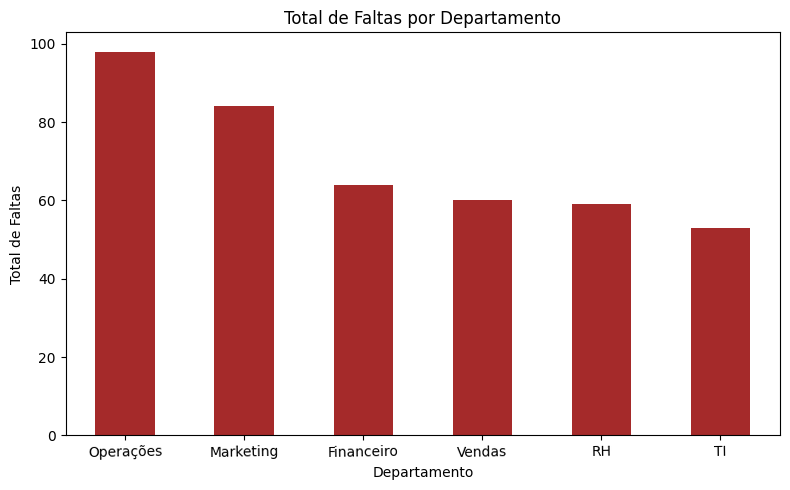

In [86]:
# Exercício 7 – Visualizações Estratégicas

# a) Gráfico de barras: número de faltas por departamento.

faltas_departamento = df.groupby('Departamento')['Faltas'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt

faltas_departamento.plot(kind='bar', figsize=(8, 5), color='brown')
print("Constata-se que o setor de operações é o que apresenta o maior absenteísmo, enquanto a área de TI tem o menor.")
plt.title('Total de Faltas por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Total de Faltas')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

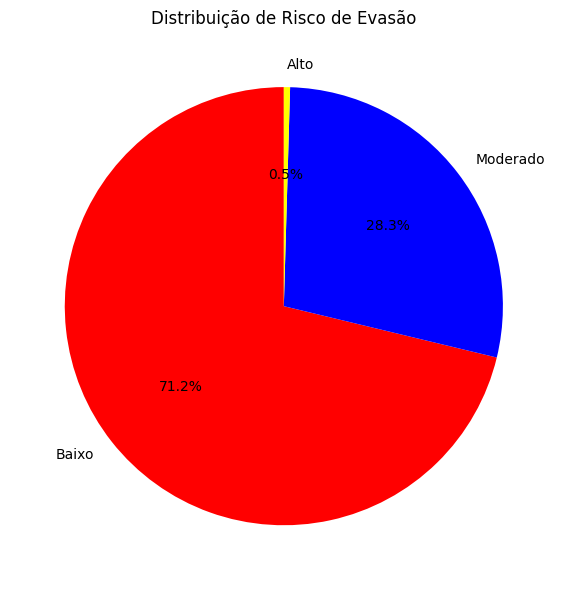

In [90]:
# b) Gráfico de pizza: distribuição de risco de evasão.

import matplotlib.pyplot as plt

distribuicao_risco = df['Risco_Evasao'].value_counts()

distribuicao_risco.plot(
    kind='pie',
    # Usei para apresentar apenas 1 casa depois da vírgula
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6),
    colors=['red','blue','yellow']
)

plt.title('Distribuição de Risco de Evasão')
plt.ylabel('')
plt.tight_layout()
plt.show()

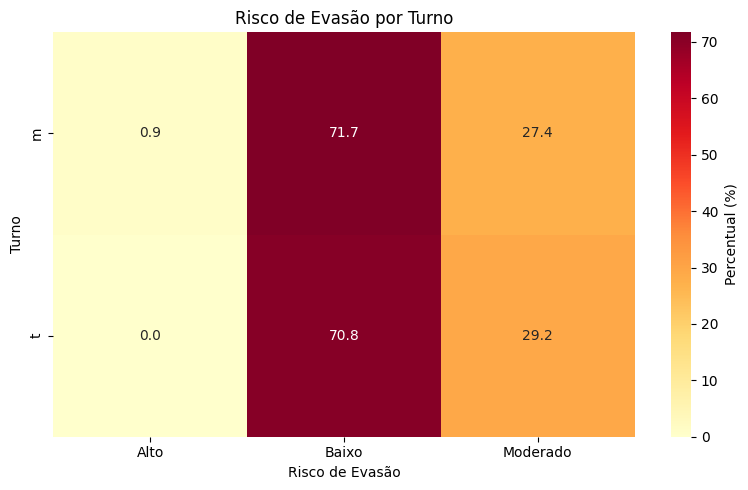

In [92]:
# c) Heatmap cruzando Turno e Risco_Evasao. Um gráfico de escala de cores

# Usei o comando pd.crosstab para criar uma tabela cruzada.
# É uma tabela de dupla entrada, que cruza duas variáveis categóricas e mostra quantas vezes cada combinação entre elas ocorre.

# Normalize index é o que faz com que o total seja de 100%
tabela = pd.crosstab(df['Turno'], df['Risco_Evasao'], normalize='index') * 100

# Essa biblioteca seaborn é voltada para gráficos estatísticos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(
    tabela,
    annot=True,           # mostra os valores nas células = True
    fmt=".1f",            # com 1 casa decimal
    cmap="YlOrRd",        # esse código traz uma paleta de cores pré existente
    cbar_kws={'label': 'Percentual (%)'}  # faz uma legenda lateral da escala de cores
)

plt.title('Risco de Evasão por Turno')
plt.xlabel('Risco de Evasão')
plt.ylabel('Turno')
plt.tight_layout()
plt.show()



